In [17]:
#import models
import numpy as np
import sys, os
import rospy
import rosbag
import math
from scipy.interpolate import interp1d
import matplotlib.pylab as plt
import time 
from tqdm.auto import tqdm


In [31]:
events = []
contact_status = []
contact_status_ts = []
contact_case = [] #0:No contact 1: center, 2:remainder of contacts as in list_of_rotations
contact_case_ts = []
contact_angle = []

contact_case_updated = []
contact_case_updated_ts = []

event_packet_size = []
event_packet_size_ts = []
contact_angle = []

#[math.radians(i) for i in range(1,11)]#

#generate label
possible_angle = [math.radians(i) for i in range(1,11)]#[0.0174532925, 0.034906585, 0.0523598776, 0.075, 0.095, 0.115, 0.135, 0.15]#
N_examples = 20
list_of_rotations = [[0, 0, 0]]

for i in range(1, N_examples):
    theta = i * 2 * math.pi/(N_examples - 1)
    for phi in possible_angle:
        rx = phi * math.cos(theta)
        ry = phi * math.sin(theta)
        rotvec = [rx, ry, 0]
        list_of_rotations.append(rotvec)

cases_dict = {i+1: list_of_rotations[i][:2] for i in range(len(list_of_rotations))}
cases_dict[0] = [0, 0]
cases_dict

{1: [0, 0],
 2: [0.016507624989807086, 0.00566707481709966],
 3: [0.03301524997961417, 0.01133414963419932],
 4: [0.04952287496942126, 0.017001224451298983],
 5: [0.06603049995922834, 0.02266829926839864],
 6: [0.08253812494903542, 0.0283353740854983],
 7: [0.09904574993884252, 0.034002448902597966],
 8: [0.1155533749286496, 0.03966952371969762],
 9: [0.13206099991845668, 0.04533659853679728],
 10: [0.14856862490826378, 0.05100367335389694],
 11: [0.16507624989807085, 0.0566707481709966],
 12: [0.013773100149832318, 0.01072003414404066],
 13: [0.027546200299664637, 0.02144006828808132],
 14: [0.04131930044949696, 0.03216010243212198],
 15: [0.05509240059932927, 0.04288013657616264],
 16: [0.06886550074916159, 0.053600170720203295],
 17: [0.08263860089899391, 0.06432020486424396],
 18: [0.09641170104882622, 0.07504023900828462],
 19: [0.11018480119865855, 0.08576027315232528],
 20: [0.12395790134849086, 0.09648030729636593],
 21: [0.13773100149832318, 0.10720034144040659],
 22: [0.00954

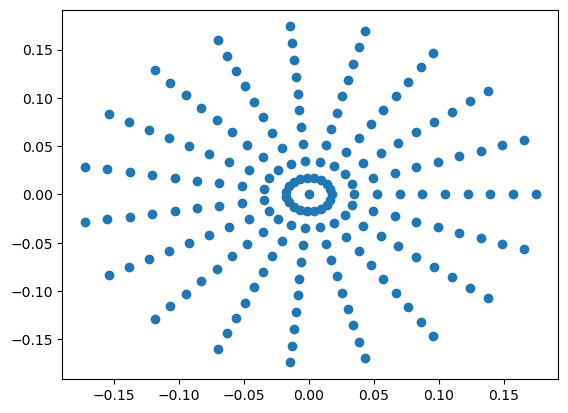

In [32]:
plt.scatter(*np.round(np.array(list_of_rotations)[:, :2].T, decimals=4))

In [7]:
with open('data/extractions/contact_extraction2/extraction_params.json', 'w') as f:
    import json
    json.dump({'cases_dict': cases_dict}, f)

In [1]:
import pandas as pd

df = pd.read_csv('data/parsed_bag1.csv')

In [2]:
df

ts  contact_status  contact_case  contact_angle_x  \
0       1672235485049392995           False           0.0         0.001636   
1       1672235485086052833           False           0.0         0.001678   
2       1672235485103664372           False           0.0         0.001699   
3       1672235485131136692           False           0.0         0.001646   
4       1672235485148841329           False           0.0         0.001657   
...                     ...             ...           ...              ...   
508727  1672246958274827871           False           0.0         0.176380   
508728  1672246958290677711           False           0.0         0.176479   
508729  1672246958303181902           False           0.0         0.176448   
508730  1672246958333194754           False           0.0         0.176357   
508731  1672246958362514493           False           0.0         0.176357   

        contact_angle_y  contact_angle_z  
0              0.000830         0.002355  
1              0.000865         0.002270  
2              0.000899         0.002283  
3              0.000848         0.002319  
4              0.000877         0.002295  
...                 ...              ...  
508727         0.000774         0.002480  
508728         0.000865         0.002503  
508729         0.000805         0.002490  
508730         0.000800         0.002475  
508731         0.000832         0.002501  

[508732 rows x 6 columns]

In [3]:
df.values[:, -3:]

array([[0.0016360277002778, 0.0008299943719652, 0.0023547193506972],
       [0.0016777573767602, 0.0008647398514302, 0.0022704336691528],
       [0.0016990647398478, 0.0008994679590901, 0.0022828001343971],
       ...,
       [0.1764481461012587, 0.000804690697261, 0.0024898716689181],
       [0.1763573082424818, 0.0008001194755205, 0.0024754256484991],
       [0.1763565161947807, 0.0008320608403044, 0.0025008068984986]],
      dtype=object)

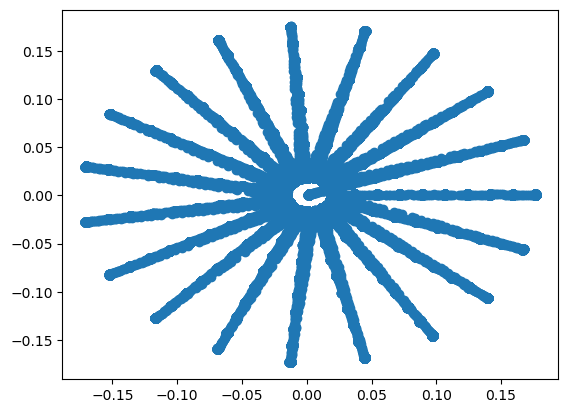

In [22]:
plt.scatter(*df.values[:, -3:-1].T)

In [33]:
import numpy as np
def rotvec2spherical(rot_vec):
    rx, ry = rot_vec.T.astype(float)
    phi = np.sqrt(rx**2 + ry**2)
    theta = np.arctan2(ry, rx)
    
    return phi, theta

rotvec2spherical(df.values[:, -3:-1])

(array([0.00183452, 0.0018875 , 0.00192246, ..., 0.17644998, 0.17635912,
        0.17635848]),
 array([0.46948878, 0.47590273, 0.48688227, ..., 0.00456046, 0.00453689,
        0.00471803]))

In [ ]:
plt.scatter(*np.degrees(rotvec2spherical(df.values[:, -3:-1])))

In [38]:
rxry=np.round(np.array(list_of_rotations)[:, :2].T, decimals=4)


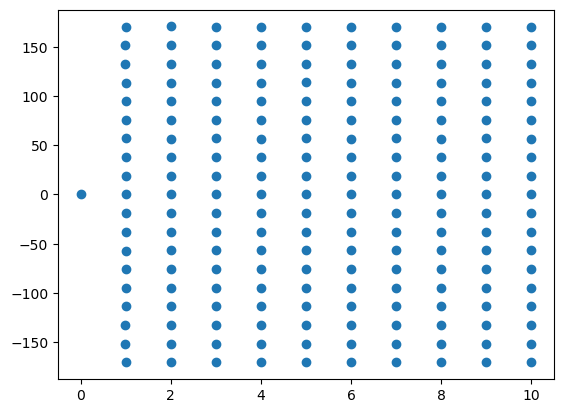

In [40]:

plt.scatter(*np.degrees(rotvec2spherical(rxry.T)))

In [10]:
rx, ry = df.values[:, -3:-1].T.astype(float)

In [11]:
import numpy as np
np.arctan2(ry, rx)

array([0.46948878, 0.47590273, 0.48688227, ..., 0.00456046, 0.00453689,
       0.00471803])

In [8]:
type(np.arctan2)

numpy.ufunc

In [9]:
np.arctan2(11, 2)

1.3909428270024184

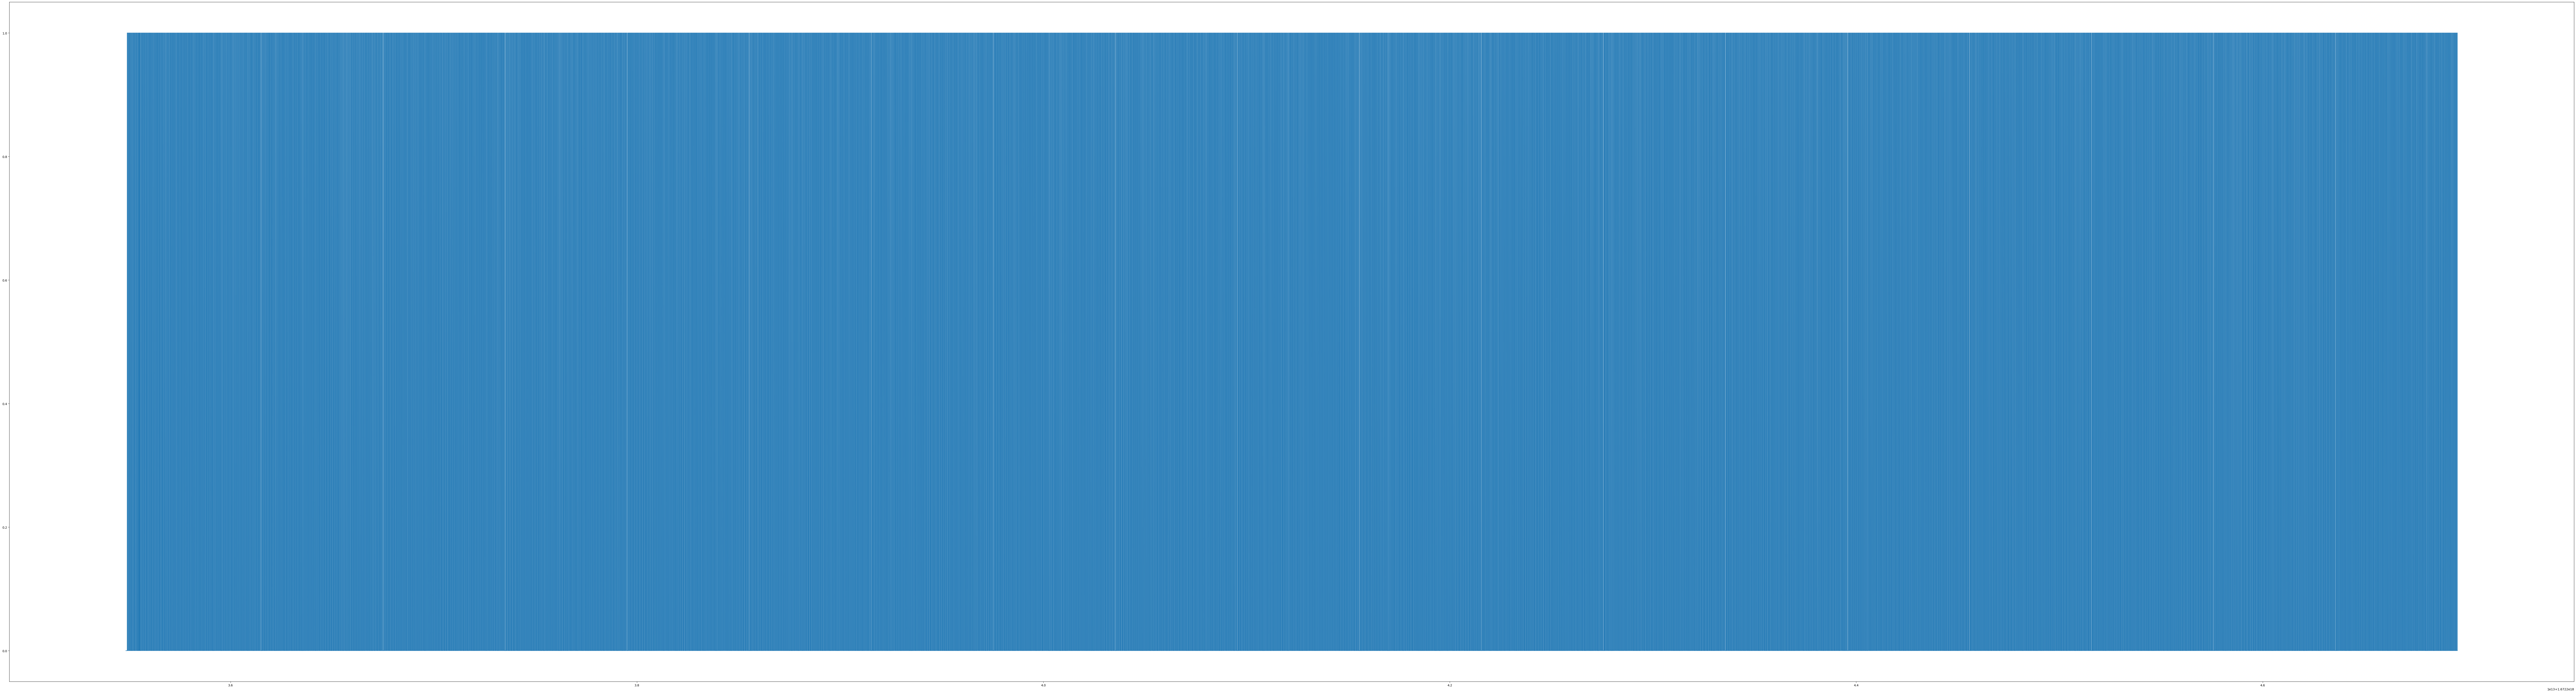

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(150, 40))
plt.plot(df['ts'], df['contact_status'])

In [5]:
def find_case(idx):
    if not contact_status[idx]:
        return 0
    else:
        best_rot_diff = 100
        best_rot_idx = 1
        i = 1
        x, y, z = df[['contact_angle_x', 'contact_angle_y', 'contact_angle_z']].iloc[idx]
        for rot in list_of_rotations:
            diff_vals = np.sqrt(np.power(rot[0] - x, 2) +  np.power(rot[1] - y, 2) + np.power(rot[2] - z, 2))
            if best_rot_diff > diff_vals:
                best_rot_diff = diff_vals
                best_rot_idx = i
            i = i + 1
        return best_rot_idx


In [6]:

plt.figure(figsize=(350, 40))
plt.plot(df['ts'], df['contact_case'])


In [7]:
import h5py
import dask.array as da

h5_arr = h5py.File('events2.h5', 'r')
events = da.array(h5_arr['events'])
events

dask.array<array, shape=(187519868, 4), dtype=int64, chunksize=(4153282, 4), chunktype=numpy.ndarray>

In [8]:
case_span = 2.66e9
find_ts_idx = lambda ts: np.searchsorted(df['ts'], ts)

def look_ahead_big(ts, idx_ts):
    fin_ts = ts + case_span
    fin_idx = find_ts_idx(fin_ts)
    print(fin_idx)
    if df['contact_status'][fin_idx]:
        #look further
        more = True
        fin_idx_ = fin_idx 
        while more:
            fin_idx_ += 1
            if fin_idx_ - fin_idx > 25:
                print('warning more than 25 idx away from init_ts + case_span')
            if df['contact_status'][fin_idx_]:
                continue
            else:
                more = False
        print(f'was before case ended by {fin_idx_ - fin_idx} indexes')
        fin_idx = fin_idx_ - 1
    else:
        #look backwards
        more = True
        fin_idx_ = fin_idx 
        while more:
            fin_idx_ -= 1
            if not df['contact_status'][fin_idx_]:
                continue
            else:
                more = False
        print(f'was ahead case ended by {fin_idx - fin_idx} indexes')
        fin_idx = fin_idx_ + 1
        
    return df['ts'][fin_idx]


def find_case(ts):
    idx = find_ts_idx(ts)
    best_rot_diff = 100
    best_rot_idx = 1
    i = 1
    x, y, z = df[['contact_angle_x', 'contact_angle_y', 'contact_angle_z']].iloc[idx]
    for rot in list_of_rotations:
        diff_vals = np.sqrt(np.power(rot[0] - x, 2) +  np.power(rot[1] - y, 2) + np.power(rot[2] - z, 2))
        if best_rot_diff > diff_vals:
            best_rot_diff = diff_vals
            best_rot_idx = i
        i = i + 1
    return best_rot_idx


i = 0 
cases_ts = []
cases_idx = []
cases = []
pbar = tqdm(total=len(df['contact_status']), desc='extracting contact timestamps')

while i < len(df['contact_status']):
    if df['contact_status'][i]:
        init_ts = df['ts'][i]
        fin_ts = look_ahead_big(init_ts, i)
        fin_idx = find_ts_idx(fin_ts)
        case = find_case(np.mean([init_ts, fin_ts]))
        
        cases.append(case)
        cases_ts.append([init_ts, fin_ts])
        cases_idx.append([i, fin_idx])
        print(len(cases_ts), init_ts, fin_ts, (fin_ts - init_ts)*1e-9, i, fin_idx, case, '\n')
        i = fin_idx + 1
        pbar.update(fin_idx + 1 - i)

    else:
        i += 1
        pbar.update(1)

extracting contact timestamps:   0%|          | 0/508732 [00:00<?, ?it/s]

415
was ahead case ended by 0 indexes
1 1672235491767075644 1672235494021186427 2.2541107830000002 293 396 1 

636
was ahead case ended by 0 indexes
2 1672235496737992380 1672235499224222965 2.486230585 518 627 1 

856
was ahead case ended by 0 indexes
3 1672235501727848791 1672235504225925082 2.4980762910000003 741 848 1 

1082
was ahead case ended by 0 indexes
4 1672235506769856204 1672235509092952022 2.323095818 965 1066 1 

1309
was ahead case ended by 0 indexes
5 1672235511854221306 1672235513942558246 2.08833694 1189 1283 1 

1526
was ahead case ended by 0 indexes
6 1672235516784860195 1672235519077366997 2.292506802 1410 1512 1 

1749
was ahead case ended by 0 indexes
7 1672235521764122500 1672235524238586682 2.474464182 1633 1739 1 

1964
was ahead case ended by 0 indexes
8 1672235526807528743 1672235529043706158 2.2361774150000002 1852 1945 1 

2180
was ahead case ended by 0 indexes
9 1672235531753489658 1672235534238151971 2.4846623130000003 2063 2172 1 

2398
was ahead case 

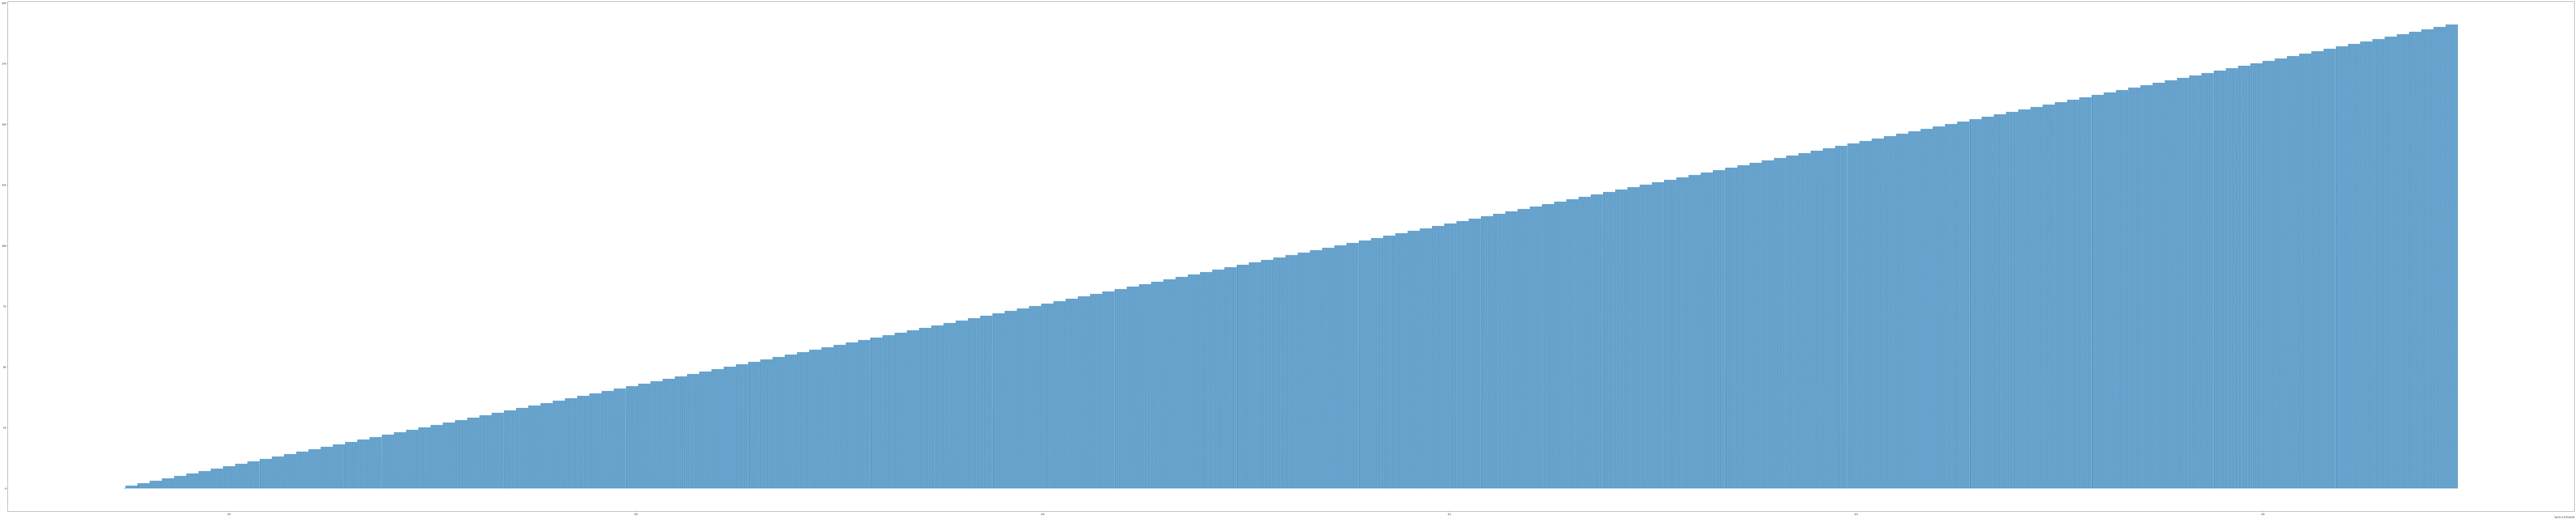

In [9]:
contact_case_alt = np.zeros(len(df))
for i, case in enumerate(cases):
    contact_case_alt[cases_idx[i][0]:cases_idx[i][1] + 1] = case
    
plt.figure(figsize=(200, 40))
plt.plot(df['ts'], contact_case_alt)

(array([  2.,   4.,   6.,   6.,   0.,  86., 362., 545., 803., 478.]),
 array([1.32522484e+09, 1.44989845e+09, 1.57457205e+09, 1.69924566e+09,
        1.82391926e+09, 1.94859287e+09, 2.07326648e+09, 2.19794008e+09,
        2.32261369e+09, 2.44728729e+09, 2.57196090e+09]),
 <BarContainer object of 10 artists>)

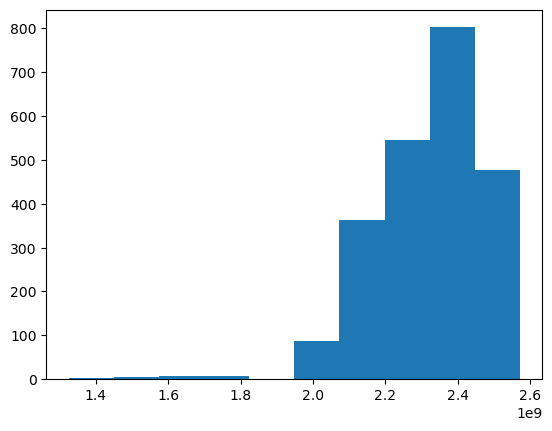

In [10]:
plt.hist([i[1]-i[0] for i in cases_ts])

(array([  2.,   5.,   3.,   6.,  43., 318., 542., 866., 427.,  80.]),
 array([ 55. ,  61.7,  68.4,  75.1,  81.8,  88.5,  95.2, 101.9, 108.6,
        115.3, 122. ]),
 <BarContainer object of 10 artists>)

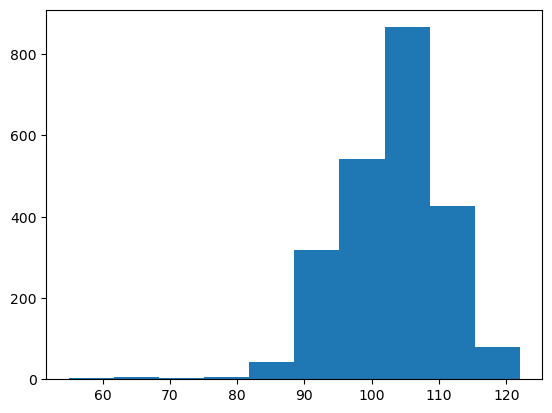

In [11]:
plt.hist([i[1]-i[0] for i in cases_idx])

In [12]:
def ev_ts2idx(ts, guess_idx, init_stepsize=50000):
    stepsize = init_stepsize
    search_sorted = lambda st: da.searchsorted(events[guess_idx:guess_idx+st, 2], da.array([ts])).compute()[0]
    n_iters = 0
    
    out = search_sorted(stepsize)
    
    while out == stepsize:
        n_iters += 1
        stepsize = 10*stepsize
        
        out = search_sorted(stepsize)
    if n_iters > 1:
        print(ts, n_iters)
    return out + guess_idx

In [13]:
delta_t = 0.05e9
margin = 0#-0.025e9
dist_from_center = lambda x, y: np.sqrt((x - 180)**2 + (y - 117)**2)
circle_rad=85

event_arrays = []
ev_idx_init = []
label_contact_case = []

guess_idx = 0

for i, idx in enumerate(tqdm(cases_idx)):
    init_ts_idx = ev_ts2idx(cases_ts[i][0] + margin, guess_idx)
    ev_idx_init.append(init_ts_idx)
    guess_idx = init_ts_idx
    fin_ts_idx = ev_ts2idx(cases_ts[i][0] + delta_t, guess_idx)#da.searchsorted(events[:, 2], da.array([cases_ts[i][0] + delta_t]))
    guess_idx = fin_ts_idx
    if fin_ts_idx - init_ts_idx + 1 < 750:
        continue    
    else:
        event_array = events[init_ts_idx:fin_ts_idx+1].compute()

    in_circle = dist_from_center(event_array[:, 0], event_array[:, 1]) < circle_rad  
    event_arrays.append(event_array[in_circle, :])
    label_contact_case.append(cases[i])

  0%|          | 0/2292 [00:00<?, ?it/s]

(array([12., 11., 12., 11., 12., 12., 12., 12., 12., 12., 12., 12., 12.,
        12., 12., 12., 12., 12., 12., 12., 12., 12., 11., 12., 12., 12.,
        12., 12., 12., 12., 12., 12., 12., 12., 11., 12., 12., 12., 12.,
        12., 12., 12., 12., 12., 12., 12., 12., 12., 12., 12., 12., 12.,
        12., 12., 12., 12., 12., 12., 12., 12., 12., 12., 10., 11., 12.,
        12., 12., 12., 12., 12., 12., 12., 12., 12., 12., 11., 12., 12.,
        12., 12., 12., 11., 12., 12., 12., 12., 12., 12., 12., 12., 12.,
        10., 12., 11., 12., 11., 12., 12., 12., 12., 12., 12., 10.,  9.,
        11., 12., 12., 12., 12., 12., 12., 12., 11., 11., 12., 12., 11.,
        12., 12., 12., 12., 10., 12., 10., 12., 11., 12., 12., 11., 12.,
        12., 11., 11., 12., 11., 12., 11., 10., 12., 12., 12., 12., 10.,
        12., 12., 12., 10., 12., 12., 12., 12., 10., 11., 11., 10., 11.,
        12., 11., 12., 12., 12., 11., 11., 11., 11.,  9., 12., 12., 12.,
        12., 12., 10.,  6.,  8., 11., 11.,  9., 11.

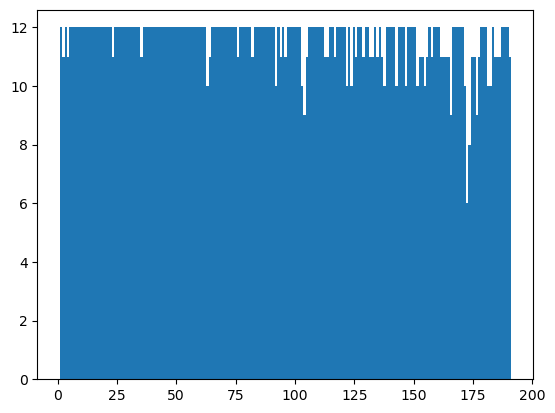

In [15]:
plt.hist(label_contact_case, bins=191)

(9527, 4)

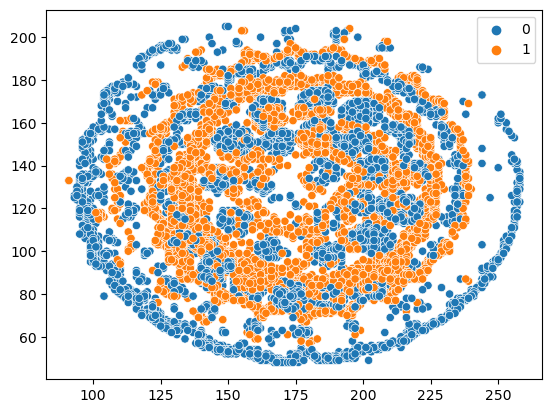

In [159]:
import seaborn as sns

idx = 100
plt.figure
sns.scatterplot(x=event_arrays[idx][:, 0], y=250-event_arrays[idx][:, 1], hue=event_arrays[idx][:, 3])
event_arrays[idx].shape

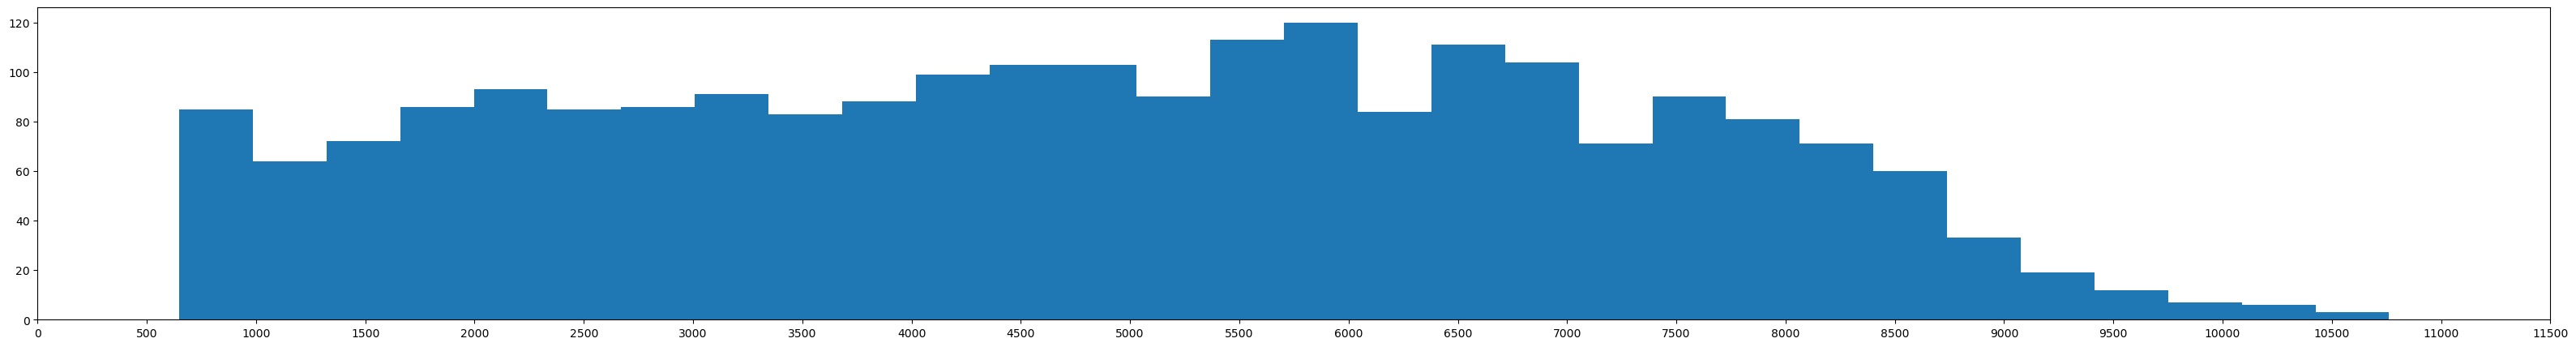

In [16]:
plt.figure(figsize=(40, 5))
plt.hist([i.shape[0] for i in event_arrays], bins=30)
plt.xticks(np.arange(12000, step=500));

In [17]:
samples={}

gen = zip(label_contact_case, event_arrays) 
for i, (case, event_array) in enumerate(gen):
    samples[f'sample_{i+1}'] = {
        'events': event_array.tolist(),
        'case': case
        }


In [18]:
from pathlib import Path
import json

EXTRACTIONS_DIR = Path('./data/extractions/').resolve()
outdir = EXTRACTIONS_DIR / 'contact_extraction2'

if not outdir.exists():
    outdir.mkdir(parents=True)
    

with open(outdir / 'samples.json', 'w') as f:
    json.dump(samples, f, indent=4)

In [36]:
from sklearn.model_selection import train_test_split


sample_idx = list(samples.keys())
cases = [str(samples[s_idx]['case']) for s_idx in sample_idx]

train_idx, val_test_idx = train_test_split(sample_idx, test_size=1-0.7, random_state=0) #fixed across extractions

cases = [str(samples[s_idx]['case']) for s_idx in val_test_idx]
val_idx, test_idx = train_test_split(val_test_idx, test_size=0.5, random_state=0) #fixed across extractions

print(len(train_idx), len(val_idx), len(test_idx))
subsets = zip(['train', 'test', 'val'], [train_idx, val_idx, test_idx])

if not outdir.exists():
    outdir.mkdir(parents=True)

for sub_name, subset in subsets:
    if not (outdir / sub_name).exists():
        (outdir / sub_name / 'raw').mkdir(parents=True)
        (outdir / sub_name / 'processed').mkdir(parents=True)
    with open(outdir / sub_name / 'raw' / 'contact_cases.json', 'w') as f:
        subset_samples = {}
        for i, subset_idx in enumerate(subset):
            sample = samples[subset_idx]
            sample['total_idx'] = subset_idx
            subset_samples[f'sample_{i+1}'] = sample
        json.dump(subset_samples, f, indent=4)

1549 332 332


In [23]:
from __future__ import division
import os.path as osp
import glob
import torch
import torch_geometric.transforms as T
import os
import json 
#os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   # see issue #152
#os.environ["CUDA_VISIBLE_DEVICES"]="0"

import torch.utils.data
from torch_geometric.data import Data, DataLoader, Dataset

import numpy as np

import torch
import torch_geometric.transforms as T
from torch_geometric.data import DataLoader
from collections.abc import Sequence

import os.path as osp
from pathlib import Path

import torch
from torch_geometric.data import Dataset
from torch_geometric.data import Data
from torch_geometric.nn.pool import radius_graph, knn_graph
from torch_geometric.utils import remove_isolated_nodes

In [24]:
cases_dict = {i+1: list_of_rotations[i][:2] for i in range(len(list_of_rotations))}
cases_dict[0] = [0, 0]
cases_dict

{1: [0, 0],
 2: [0.016507624989807086, 0.00566707481709966],
 3: [0.03301524997961417, 0.01133414963419932],
 4: [0.04952287496942126, 0.017001224451298983],
 5: [0.06603049995922834, 0.02266829926839864],
 6: [0.08253812494903542, 0.0283353740854983],
 7: [0.09904574993884252, 0.034002448902597966],
 8: [0.1155533749286496, 0.03966952371969762],
 9: [0.13206099991845668, 0.04533659853679728],
 10: [0.14856862490826378, 0.05100367335389694],
 11: [0.16507624989807085, 0.0566707481709966],
 12: [0.013773100149832318, 0.01072003414404066],
 13: [0.027546200299664637, 0.02144006828808132],
 14: [0.04131930044949696, 0.03216010243212198],
 15: [0.05509240059932927, 0.04288013657616264],
 16: [0.06886550074916159, 0.053600170720203295],
 17: [0.08263860089899391, 0.06432020486424396],
 18: [0.09641170104882622, 0.07504023900828462],
 19: [0.11018480119865855, 0.08576027315232528],
 20: [0.12395790134849086, 0.09648030729636593],
 21: [0.13773100149832318, 0.10720034144040659],
 22: [0.00954

In [40]:
def files_exist(files):
    return all([osp.exists(f) for f in files])

im_height=260
im_width=346

class TactileDataset(Dataset):
    """_summary_

        Args:
            root (_type_): _description_
            transform (_type_, optional): _description_. Defaults to None.
            pre_transform (_type_, optional): _description_. Defaults to None.
            features (str, optional): _description_. Defaults to 'all'.
            reset (bool, optional): _description_. Defaults to False.
    """

    def __init__(self, root, transform=None, pre_transform=None, features='all', reset=False, augment=False):
        """_summary_

        Args:
            root (_type_): _description_
            transform (_type_, optional): _description_. Defaults to None.
            pre_transform (_type_, optional): _description_. Defaults to None.
            features (str, optional): _description_. Defaults to 'all'.
            reset (bool, optional): _description_. Defaults to False.
        """
        if reset:
            print('rm -rf ' + root + '/processed')
            ret=os.system('rm -rf ' + root + '/processed')
        root = Path(root)

        assert features in ['pol', 'coords', 'all', 'pol_time']
        self.features = features

        self.augment = augment
        super(TactileDataset, self).__init__(root, transform, pre_transform)
        self._indices = None
        
    def indices(self) -> Sequence:
        return range(self.len()) if self._indices is None else self._indices

    @property
    def raw_file_names(self):
        filenames = os.path.join(self.raw_dir, 'contact_cases.json')
        file = [f.split('/')[-1] for f in filenames]
        #print(file)
        return file

    @property
    def processed_file_names(self):
        #glob.glob(os.path.join(self.raw_dir,'../processed/', '*_.pt'))
        filenames = glob.glob(str(self.root / 'processed' / 'sample_*.pt'))
        file = [f.split('/')[-1] for f in filenames]
        saved_file = [f.replace('.pt','.pt') for f in file]
        return saved_file

    def __len__(self):
        return len(self.processed_file_names)

    def indices(self) -> Sequence:
        return range(self.__len__()) if self._indices is None else self._indices

    def sample_generator(self, samples_):
        for key, sample in samples_.items():
            case = sample['case']
            event_array = np.array(sample['events'])
            if not self.augment:
               yield case, event_array 
            else:
                for angle in [0, 90, 180, 270]:
                    if angle == 0:
                        yield case, event_array
                    else:
                        yield rotate_case(event_array, case, angle)

    def process(self):
        knn = 32
        with open(self.root / 'raw' / 'contact_cases.json', 'r') as f:
            samples_ = json.load(f)

        samples = samples_
        if self.augment:
            samples = {}
            for i, (case, event_array) in enumerate(self.sample_generator(samples_)):
                samples[f'sample_{i+1}'] = {
                    'events': event_array,
                    'case': case
                }
                

        for sample_id in samples.keys():
            events = np.array(samples[sample_id]['events'])

            coord1, coord2 = torch.tensor(events[:, 0:2].astype(np.float32)).T 
            ts = events[:, 2]
            ts = ((ts - ts.min()) / (ts.max() - ts.min())).astype(np.float32)
            coord3 = torch.tensor(ts)
            pos = torch.stack((coord1 / im_width, coord2 / im_height, coord3)).T

            if self.features == 'pol':
                feature = torch.tensor(events[:, 3].astype(np.float32))
                feature = feature.view(-1, 1)
            elif self.features == 'coords':
                feature = torch.stack((coord1 / im_width, coord2 / im_height, coord3)).T
            elif self.features == 'pol_time':
                feature = torch.stack((
                    torch.tensor(events[:, 3].astype(np.float32)),
                    coord3 
                )).T
            elif self.features == 'all':
                feature = torch.hstack((
                    torch.stack((coord1 / im_width, coord2 / im_height, coord3)).T, 
                    torch.tensor(events[:, 3].astype(np.float32)).reshape(-1, 1)
                    ))

            case = samples[sample_id]['case']

            #edge_index = radius_graph(pos, r=0.1, max_num_neighbors=10)
            edge_index = knn_graph(pos, knn)
            if self.features == 'pol_time':
                pos = pos[:, :2]

            #edge_index, _, mask = remove_isolated_nodes(edge_index=edge_index, num_nodes=feature.shape[0])

            #print(edge_index, sum(mask))
            #print(mask.shape, data.x.shape, data.edge_index.shape)
            
            pseudo_maker = T.Cartesian(cat=False, norm=True)
            

            y = torch.tensor(np.array(cases_dict[case], dtype=np.float32)).reshape(1, -1)

            data = Data(x=feature, edge_index=edge_index, pos=pos, y=y)
            data = pseudo_maker(data)

            if self.pre_filter is not None and not self.pre_filter(data):
                    continue

            if self.pre_transform is not None:
                    data = self.pre_transform(data)

            torch.save(data, self.root / 'processed' / f'{sample_id}.pt')
        """
        with open(self.root.parent / 'extraction_params.json', 'r') as f:
            params = json.load(f)
        
        params['kNN'] = knn
        params['node_features'] = self.features
        print(params)
        with open(self.root.parent / 'extraction_params.json', 'w') as f:
            json.dump(params, f, indent=4)
        """
            
            

    def get(self, idx):
        # print("I'm in get ", self.processed_dir)

        data = torch.load(osp.join(self.processed_paths[idx]))
        return data

    def load_all_raw(self):
        samples = {}
        for subset in ['train', 'val', 'test']:
            with open(self.root.parent / subset / 'raw' / 'contact_cases.json', 'r') as f:
                subset_samples = json.load(f)
                subset_samples_tot_idx = {item[1]['total_idx']: 
                                        {
                                            'events': item[1]['events'], 
                                            'case': item[1]['case']
                                        } for item in subset_samples.items()}
            
            samples.update(subset_samples_tot_idx)
        return samples

In [43]:
train_td = TactileDataset('data/extractions/contact_extraction2/train')
val_td = TactileDataset('data/extractions/contact_extraction2/val')

Processing...
Done!


In [45]:
import json
import torch
import torch_geometric as pyg
from tqdm.auto import tqdm, trange  
from pathlib import Path
from numpy import pi
from pandas import DataFrame

class TrainModel():

    def __init__(
        self, 
        extraction_case_dir, 
        model,
        n_epochs = 150,
        optimizer = 'adam',
        lr = 0.001,
        loss_func = torch.nn.L1Loss(),
        transform = None,
        features = 'all',
        weight_decay=0,
        patience=10,
        batch = 1,
        augment=False
        ):

        self.extraction_case_dir = Path(extraction_case_dir)
        self.transform = transform

        self.train_data = TactileDataset(self.extraction_case_dir / 'train', transform=transform, features=features, augment=augment)
        self.val_data = TactileDataset(self.extraction_case_dir / 'val', features=features)
        self.test_data = TactileDataset(self.extraction_case_dir / 'test', features=features)

        self.train_loader = pyg.loader.DataLoader(self.train_data, shuffle=True, batch_size=batch)
        self.val_loader = pyg.loader.DataLoader(self.val_data)
        self.test_loader = pyg.loader.DataLoader(self.test_data)

        self.model = model
        self.n_epochs = n_epochs


        if optimizer == 'adam':
            self.optimizer = torch.optim.Adam(self.model.parameters(), lr=lr, weight_decay=weight_decay)
        else:
            raise NotImplementedError('use tm.optimizer = torch.optim.<optimizer>')
        
        self.scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(self.optimizer, 'min', min_lr=1e-5, patience=patience)

        self.loss_func = loss_func

        self.device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
        

    def train(self):
        self.train_losses = []
        self.val_losses = []
        self.lr = []

        name = str(type(self.model)).split('.')[-1][:-2]
        path = Path('results') / name

        for epoch in trange(self.n_epochs, desc='training', unit='epoch'):
            #bunny(epoch)
            epoch_loss = 0
            lr = self.optimizer.param_groups[0]['lr']
            self.lr.append(lr)
            val_loss = torch.inf
            with tqdm(self.train_loader, unit="batch") as tepoch:
                for i, data in enumerate(tepoch):
                    tepoch.set_description(f"Epoch {epoch}")
                    with torch.autograd.detect_anomaly():
                        data = data.to(self.device)
                        self.optimizer.zero_grad()
                        end_point = self.model(data)
                        loss = self.loss_func(end_point, data.y)
                        loss.backward()
                        self.optimizer.step()
                        lr = self.optimizer.param_groups[0]['lr']

                        epoch_loss += loss.detach().item()
                    
                        tepoch.set_postfix({
                            'train_loss': epoch_loss / (i + 1), 
                            'train_loss_degrees': epoch_loss / (i + 1) * 180/pi, 
                            'val_loss': self.val_losses[epoch - 1] if epoch > 0 else 'na',
                            'val_loss_degrees': self.val_losses[epoch - 1] * 180/pi if epoch > 0 else 'na',
                            'lr': lr
                            })

                self.scheduler.step(val_loss)
                epoch_loss /= len(self.train_data)
                val_loss = self.validate()
                tepoch.set_postfix({'train_loss': epoch_loss, 'val_loss': val_loss})
                self.train_losses.append(epoch_loss)
                self.val_losses.append(val_loss)
            if (epoch + 1) % 1 == 0:
                self.log(current_epoch=epoch)
        torch.save(self.model, path / 'model.pt')

    def validate(self):
        loss = 0
        for i, data in enumerate(self.val_loader):      
            data = data.to(self.device)
            end_point = self.model(data)

            loss += self.loss_func(end_point, data.y).detach().item()
        loss /= len(self.val_data)
        return loss
    
    def test(self):
        loss = 0
        for i, data in enumerate(self.test_loader):      
            data = data.to(self.device)
            end_point = self.model(data)

            loss += self.loss_func(end_point, data.y).detach().item()
        loss /= len(self.train_data)
        return loss

    def augment(self, batch):
        pass

    def log(self, current_epoch):
        #find model name
        print('logging')
        name = str(type(self.model)).split('.')[-1][:-2]
        path = Path('results') / name
        if not path.exists():
            path.mkdir(parents=True)

        with open(path / 'training_params.json', 'w') as f:
            params = {
                'model': name,
                'extraction_used': str(self.extraction_case_dir),
                'n_epochs': self.n_epochs,
                'final_val_loss_degrees': self.val_losses[-1] * 180 / pi,
            }
            json.dump(params, f, indent=4)

        train_log = { 
            'epoch': [i for i in range(1, current_epoch+2)],
            'train_loss': self.train_losses,
            'val_loss': self.val_losses,
            'lr': self.lr
        }
        DataFrame(train_log).to_csv(path / 'train_log.csv', index=False)



In [48]:
import torch
from torch_geometric.nn import SplineConv, voxel_grid, max_pool, max_pool_x
import torch.nn.functional as F
import torch_geometric.transforms as T

class spline(torch.nn.Module):
    def __init__(self):
        super(spline, self).__init__()
        self.conv1 = SplineConv(4, 64, dim=3, kernel_size=3)
        self.bn1 = torch.nn.BatchNorm1d(64)
        self.conv2 = SplineConv(64, 128, dim=3, kernel_size=3)
        self.bn2 = torch.nn.BatchNorm1d(128)
        self.conv3 = SplineConv(128, 256, dim=3, kernel_size=3)
        self.bn3 = torch.nn.BatchNorm1d(256)
        self.conv4 = SplineConv(256, 512, dim=3, kernel_size=3)
        self.bn4 = torch.nn.BatchNorm1d(512)
        self.fc1 = torch.nn.Linear(64 * 512, 1024)
        self.fc2 = torch.nn.Linear(1024, 2)

    def forward(self, data):
        data.x = F.elu(self.conv1(data.x, data.edge_index, data.edge_attr))
        data.x = self.bn1(data.x)
        cluster = voxel_grid(data.pos, batch=data.batch, size=0.05)
        data = max_pool(cluster, data, transform=T.Cartesian(cat=False))

        data.x = F.elu(self.conv2(data.x, data.edge_index, data.edge_attr))
        data.x = self.bn2(data.x)
        cluster = voxel_grid(data.pos, batch=data.batch, size=0.1)
        data = max_pool(cluster, data, transform=T.Cartesian(cat=False))
        
        data.x = F.elu(self.conv3(data.x, data.edge_index, data.edge_attr))
        data.x = self.bn3(data.x)
        cluster = voxel_grid(data.pos,batch= data.batch, size=0.15)
        data = max_pool(cluster, data, transform=T.Cartesian(cat=False))

        data.x = F.elu(self.conv4(data.x, data.edge_index, data.edge_attr))
        data.x = self.bn4(data.x)
        cluster = voxel_grid(data.pos, batch=data.batch, size=0.25)
        x,_ = max_pool_x(cluster, data.x, batch=data.batch, size=64)

        x = x.view(-1, self.fc1.weight.size(1))
        x = F.elu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        
        return x


In [50]:
model = spline()
model

spline(
  (conv1): SplineConv(4, 64, dim=3)
  (bn1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): SplineConv(64, 128, dim=3)
  (bn2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): SplineConv(128, 256, dim=3)
  (bn3): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): SplineConv(256, 512, dim=3)
  (bn4): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=32768, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=2, bias=True)
)

In [56]:
tm = TrainModel('data/extractions/contact_extraction2/', model.cuda(), batch=4)

In [ ]:
tm.train()

training:   0%|          | 0/150 [00:00<?, ?epoch/s]

  0%|          | 0/388 [00:00<?, ?batch/s]

/tmp/ipykernel_8130/1431836494.py:71: UserWarning: Anomaly Detection has been enabled. This mode will increase the runtime and should only be enabled for debugging.
  with torch.autograd.detect_anomaly():


logging


  0%|          | 0/388 [00:00<?, ?batch/s]

logging


  0%|          | 0/388 [00:00<?, ?batch/s]

logging


  0%|          | 0/388 [00:00<?, ?batch/s]

logging


  0%|          | 0/388 [00:00<?, ?batch/s]

logging


  0%|          | 0/388 [00:00<?, ?batch/s]

logging


  0%|          | 0/388 [00:00<?, ?batch/s]